Álvaro Muñoz Jiménez

INFORME DE DATASET LA LIGA

ÍNDICE:
1)Introducción
2)Objetivos
3)Descripción de variables incluídas en el dataset
4)Análisis exploratorio de datos
5)Distribución de las variables
6)Análisis de matriz de correlaciones
7)Análisis de las relaciones entre variables 
8)Generación de dummies 
9)Modelo de predicción
10)Conclusiones

1)Introducción:

La base de datos de La Liga contiene información sobre los partidos del campeonato de fútbol español comprendida  desde el 
período de 1970-71 hasta 2016-17, con un total de 47 temporadas.

Entre la información recopilada podemos observar la cantidad de puntos, victorias, derrotas, goles, etc.

2)Objetivos:

El propósito de este informe es analizar y extraer las características principales de este conjunto de datos, como las
estadísticas de los equipos que han sido campeones, análisis de victorias / derrotas, goles marcados / concedidos, entre otros 
aspectos.

3)Descripción de variables incluídas en el dataset

El dataset a analizar procede de la plataforma web Kaggle. La muestra cuenta con 908 registros de estadísticas relacionadas
con los equipos de fútbol de la liga española. Las variables son las siguientes:

Season:temporada en el periodo 1970/2016.
Club:equipos de futbol en cada temporada.
Home_win:partidos ganados en casa.
Away_win:partidos ganados como visitante.
Home_loss:partidos perdidos en casa.
Away_loss:partidos perdidos fuera de casa.
Matches_won:total de partidos ganados.
Matches_lost:total de partidos perdidos.
Matches_drawn:total de partidos empatados.
Total_matches:total de partidos.
Points:puntos obtenidos en una temporada.
Home_goals:goles en casa.
Away_goals:goles fuera.
Goals_scored:goles en total.
Goals_conceded:goles encajados.
Goal_difference:diferencia de goles.

4)Análisis exploratorio de datos:

En primer lugar cargamos una serie de paquetes que vamos a utilizar en el presente informe.

In [3]:
#Manipulación de dataframes:
import pandas as pd

# Funciones de álgebra lineal
import numpy as np

# Biblioteca para lazos
import itertools

# Visualización de gráficos
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV 
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler 

El siguiente paso es importar la base de datos:

In [5]:
datos = pd.read_csv("LaLiga_dataset.csv")

Asignamos 5 muestras aleatorias para el conocimiento del formato del conjunto de datos:

In [6]:
datos.sample(5)

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
479,1995-96,Real Sociedad,12,5,4,9,17,13,12,42,63,38,24,62,53,9
14,1970-71,Valencia,12,6,1,4,18,5,7,30,61,27,14,41,19,22
564,1999-00,Real Zaragoza,11,5,1,6,16,7,15,38,63,36,24,60,40,20
265,1984-85,Athletic Club,9,4,1,5,13,6,15,34,54,28,11,39,26,13
492,1996-97,Celta de Vigo,8,4,6,11,12,17,13,42,49,34,17,51,54,-3


Observamos que cada fila corresponde a un equipo de futbol de la liga española en temporadas de distintos periodos.
Cada columna representa las estadísticas de los equipos a lo largo de las temporadas.

Vamos a echar un vistazo a la dimensionalidad de los datos:

In [5]:
print(datos.shape)

(908, 16)


Desde la salida, podemos observar que la tabla contiene 908 filas y 16 columnas.

Ahora vemos los nombres de las columnas:

In [6]:
print(datos.columns)

Index(['season', 'club', 'home_win', 'away_win', 'home_loss', 'away_loss',
       'matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
       'points', 'home_goals', 'away_goals', 'goals_scored', 'goals_conceded',
       'goal_difference'],
      dtype='object')


Utilizamos el método info() para generar información general sobre el conjunto de datos:

In [45]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
season             908 non-null object
club               908 non-null object
home_win           908 non-null int64
away_win           908 non-null int64
home_loss          908 non-null int64
away_loss          908 non-null int64
matches_won        908 non-null int64
matches_lost       908 non-null int64
matches_drawn      908 non-null int64
total_matches      908 non-null int64
points             908 non-null int64
home_goals         908 non-null int64
away_goals         908 non-null int64
goals_scored       908 non-null int64
goals_conceded     908 non-null int64
goal_difference    908 non-null int64
dtypes: int64(14), object(2)
memory usage: 113.6+ KB
None


Los tipos de datos de nuestra base de datos son int64 y object. Vemos que 2 características o variables son de tipo objeto y 14 
características son numéricas.

Con este mismo método, podemos ver fácilmente si hay valores faltantes. Aquí, no hay ninguno porque cada columna contiene 908
observaciones, el mismo número de filas que comprobamos anteriormente.

In [8]:
print(datos.describe())

         home_win    away_win   home_loss   away_loss  matches_won  \
count  908.000000  908.000000  908.000000  908.000000   908.000000   
mean     9.582599    4.118943    4.118943    9.582599    13.701542   
std      3.107555    2.776725    2.531206    3.092974     4.966050   
min      1.000000    0.000000    0.000000    1.000000     2.000000   
25%      7.000000    2.000000    2.000000    8.000000    10.000000   
50%      9.000000    4.000000    4.000000   10.000000    13.000000   
75%     12.000000    6.000000    6.000000   12.000000    16.000000   
max     19.000000   16.000000   15.000000   18.000000    32.000000   

       matches_lost  matches_drawn  total_matches      points  home_goals  \
count    908.000000     908.000000     908.000000  908.000000  908.000000   
mean      13.701542       9.577093      36.980176   50.681718   29.508811   
std        4.589442       2.986852       2.522150   14.104626    9.757192   
min        1.000000       1.000000      30.000000   13.000000

El método descrito muestra las características estadísticas básicas de cada característica o variable numérica, el número de
valores no perdidos, media, desviación estándar, rango, mediana, cuartiles 0.25 y 0.75.

Destaca, por ejemplo, que la media del numero de partidos ganados es muy similar al número de partidos perdidos. Sin embargo, 
no todos los equipos tienen los mismos puntos en una temporada. Las demás variables por lo tanto tienen importancia en los 
resultados obtenidos al final de temporada.

5)Distribución de las variables:

Primero analizaremos las variables categoricas, comprobando su frecuencia relativa:

In [7]:
 datos['club'].value_counts()

Barcelona                 47
Athletic Club             47
Real Madrid               47
Valencia                  46
Atletico de Madrid        45
Espanyol                  45
Real Sociedad             44
Sevilla                   41
Real Zaragoza             39
Betis                     36
Sporting de Gijon         33
Celta de Vigo             31
Osasuna                   29
Valladolid                28
Racing de Santander       28
Deportivo                 26
Mallorca                  22
Las Palmas                20
Villarreal                17
Rayo Vallecano            17
Real Oviedo               16
Malaga                    16
Salamanca                 12
Tenerife                  12
Hercules                  12
CD Malaga                 12
Getafe                    12
Cadiz                     12
Granada                   12
Elche                     10
Murcia                    10
Logrones                   9
Levante                    9
Albacete                   7
Alaves        

Observamos el número de temporadas que ha estado cada equipo en La Liga. Cabe destacar que La Liga corresponde a la primera 
división española de fútbol. Por lo tanto aparecen distintos equipos en determinadas temporadas en función si han logrado 
mantenerse en primera división en función de los puntos obtenidos en una temporada.

Procedemos a visualizar el gráfico de barras de frecuencias relativas:

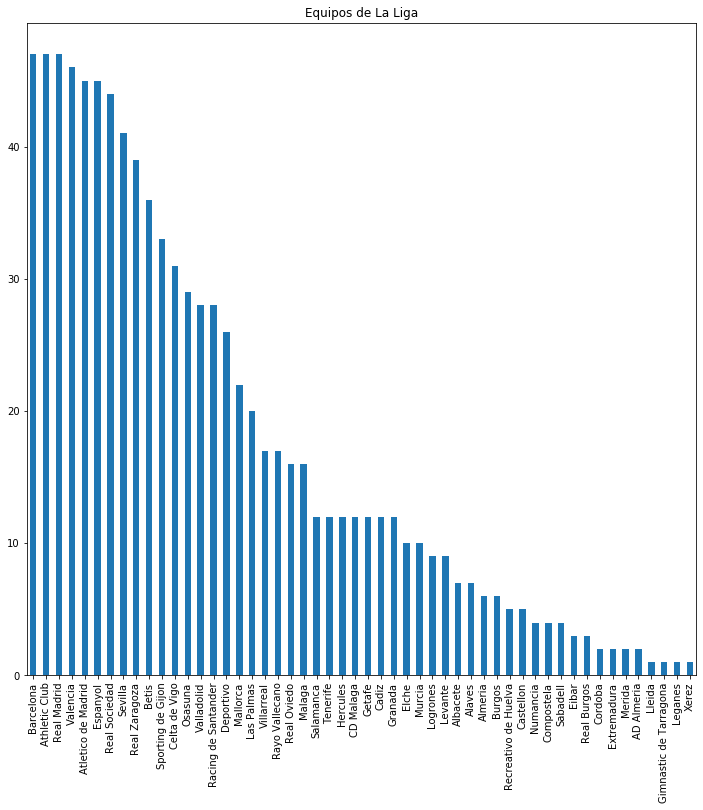

In [21]:
plot = (datos['club'].value_counts()).plot(
kind='bar', title='Equipos de La Liga', figsize=(12, 12))

En este gráfico podemos observar la frecuencia relativa de los equipos de La Liga. 

Barcelona, Athletic Club y Real Madrid han estado presentes en cada una de las temporadas, sin bajar a segunda división.

El Atlético de Madrid no estuvo durante dos temporadas en primera división(temporadas 2000/2001 y 2001/2002).

In [10]:
datos['season'].value_counts()

1996-97    22
1995-96    22
2003-04    20
2005-06    20
2011-12    20
2002-03    20
1997-98    20
2000-01    20
1999-00    20
2001-02    20
1990-91    20
1998-99    20
2004-05    20
1988-89    20
2013-14    20
1987-88    20
1992-93    20
2014-15    20
2010-11    20
2007-08    20
1989-90    20
2015-16    20
2006-07    20
2012-13    20
2008-09    20
1991-92    20
1994-95    20
2016-17    20
2009-10    20
1993-94    20
1971-72    18
1975-76    18
1974-75    18
1984-85    18
1973-74    18
1982-83    18
1981-82    18
1983-84    18
1985-86    18
1972-73    18
1979-80    18
1978-79    18
1986-87    18
1976-77    18
1977-78    18
1980-81    18
1970-71    16
Name: season, dtype: int64

Observamos el número de equipos que hubo en cada una de las temporadas. No siempre jugaron los mismos partidos y en consecuencia el número total de equipos no fue el mismo.

A continuación vemos los histogramas de las variables numéricas:

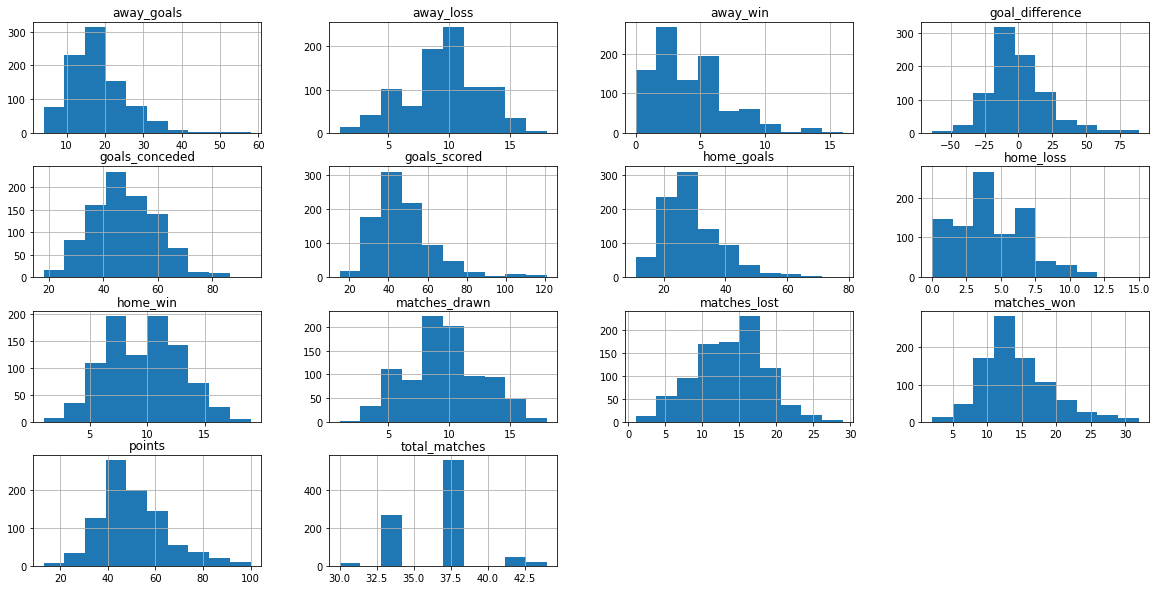

In [23]:
datos.hist()
plt.gcf().set_size_inches(20,10)
plt.show()

Observamos que las variables numéricas de la base de datos siguen una distribución normal aparentemente.

Mediante los gráficos de dispersion detectamos si existen o no valores atípicos en nuestra muestra de estudio:

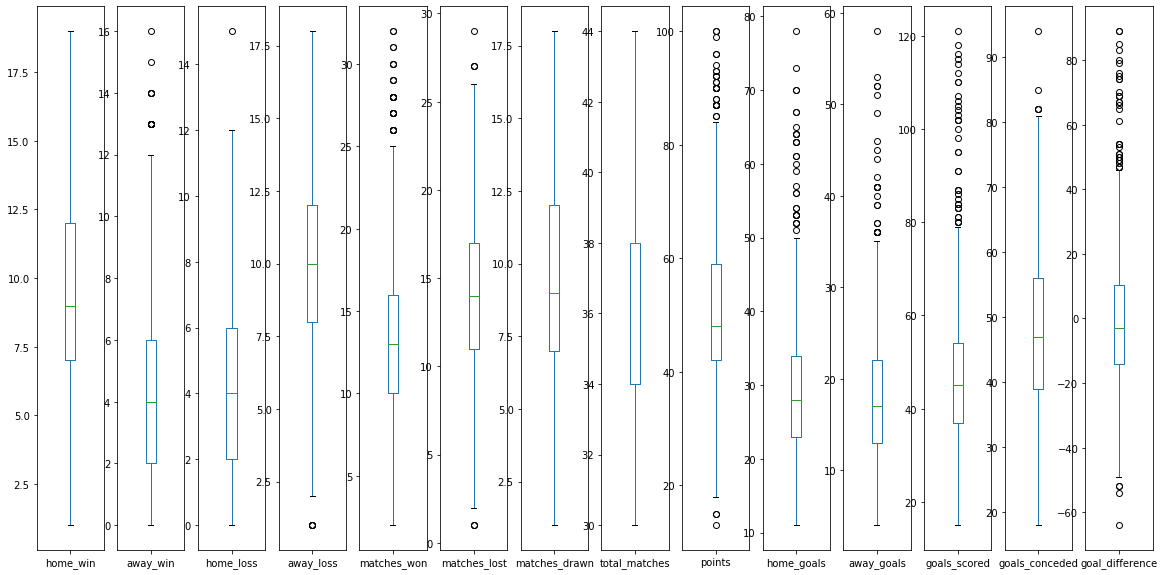

In [24]:
datos.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.gcf().set_size_inches(20,10)
plt.show()

6)Análisis de matriz de correlaciones:

Según los datos que hemos analizado deducimos que todas las variables que componen la base de datos de La Liga podrían estar
relacionadas  entre sí y para ver las similitudes existentes entre ellas calculamos la matriz triangular de correlaciones 
entre las variables numéricas:

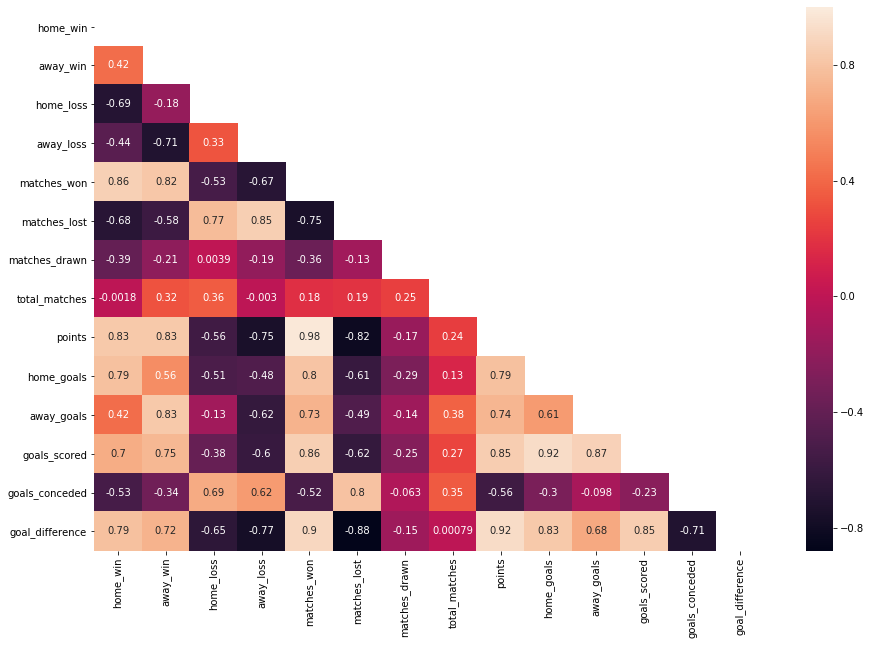

In [9]:
mask = np.zeros_like(datos.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap (datos.corr(), mask = mask, annot = True)
plt.gcf().set_size_inches(15,10)
plt.show()

En el gráfico observamos que lógicamente el número de puntos por equipo esta  muy relacionado con los partidos ganados, 
obteniendo el mismo coeficiente de correlación tanto si juegas en casa como sí eres el equipo visitante. Sin embargo el nivel
de correlacion entre los puntos y las derrotas en casa o fuera de casa no es la misma, siendo más negativa en los partidos que 
pierdes fuera de casa.

La variable puntos es la más importante en la clasificacion de los equipos en la temporada y determina que equipo es el ganado
al final de temporada. Vamos a estudiar el grado de correlacion entre esta variable y las demás:

In [10]:
corr = datos.corr()
corr[['points']].sort_values(by = 'points',ascending = False)\
.style.background_gradient()

,points
points,1
matches_won,0.980271
goal_difference,0.920802
goals_scored,0.851093
home_win,0.828139
away_win,0.826363
home_goals,0.787798
away_goals,0.737846
total_matches,0.242682
matches_drawn,-0.167264


Como era de esperar, la correlacíon es más alta si ganas los partidos y es más baja si los pierdes, ya sea en casa o fuera 
de casa.

7)Análisis de las relaciones entre variables 

Inicialmente, vamos a analizar gráficamente la relación entre el número de clubes y partidos por temporada:

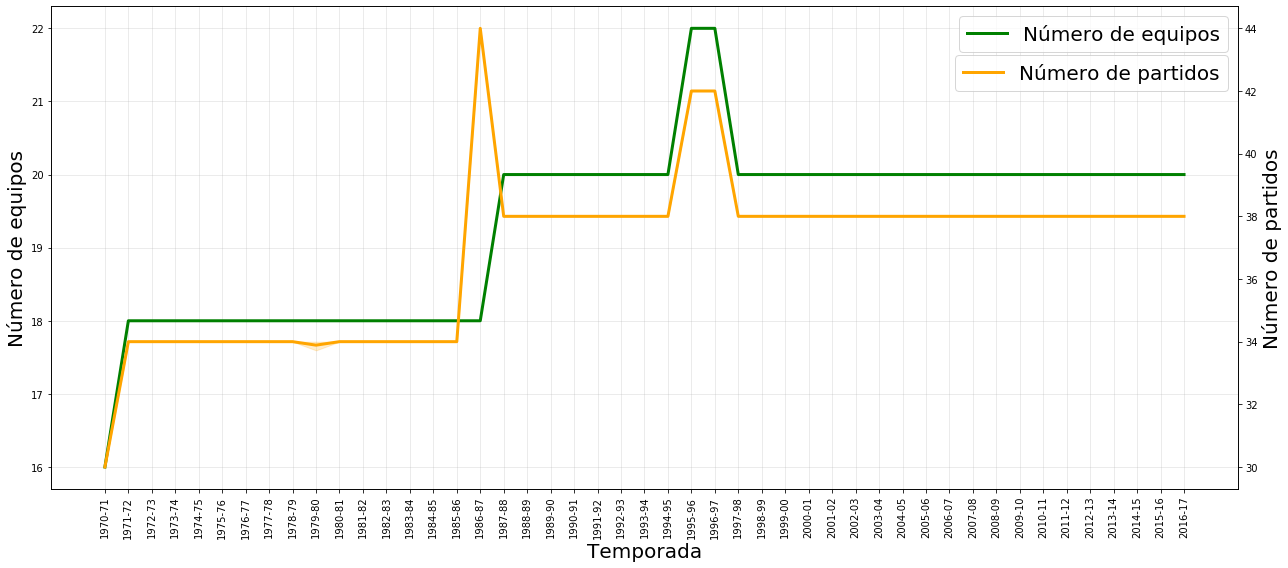

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 8))

#Primer Plot: número de clubes por temporada
sns.lineplot(x=datos.season.unique(), y=datos.groupby(by='season').size().values, 
             color='green', linewidth=3, label='Número de equipos', ax=ax1)

ax1.set_ylabel('Número de equipos', fontsize=20) 
ax1.set_xlabel('Temporada', fontsize=20) 
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=90);
ax1.legend(loc=1, bbox_to_anchor=(1, 1), fontsize=20) 
ax1.grid(alpha=0.3) 

#Segundo Plot: numero de partidos por temporada
ax2 = ax1.twinx() 
sns.lineplot(x='season', y='total_matches', color='orange', linewidth=3,
             data=datos, label='Número de partidos', ax=ax2)

ax2.set_ylabel('Número de partidos', fontsize=20) 
ax2.legend(loc=1, bbox_to_anchor=(1, 0.92), fontsize=20)

fig.tight_layout() 

En el gráfico anterior, vemos que históricamente existe una relación directa entre el número de equipos y el número de partidos
en La Liga.

En general, la regulación siempre ha sido la de los puntos por temporada, donde el club campeon es el equipo que suma más puntos
a lo largo de la temporada.

Destaca en la temporada 1979-80, no se celebró un partido entre Málaga y Almería ya que el primer equipo no asistió al estadio.

Desde 1997-98, el número de equipos se ha mantenido en 20 participantes por temporada.

Ahora vamos a analizar que equipos han ganado más temporadas a lo largo del periodo señalado:

In [14]:
equiposCampeones = datos.loc[datos.groupby('season')['points'].idxmax()].club.value_counts().index
numeroTitulos = datos.loc[datos.groupby('season')['points'].idxmax()].club.value_counts().values

In [15]:
equiposCampeones

Index(['Real Madrid', 'Barcelona', 'Atletico de Madrid', 'Valencia',
       'Real Sociedad', 'Athletic Club', 'Deportivo'],
      dtype='object')

In [16]:
numeroTitulos

array([21, 17,  4,  2,  1,  1,  1], dtype=int64)

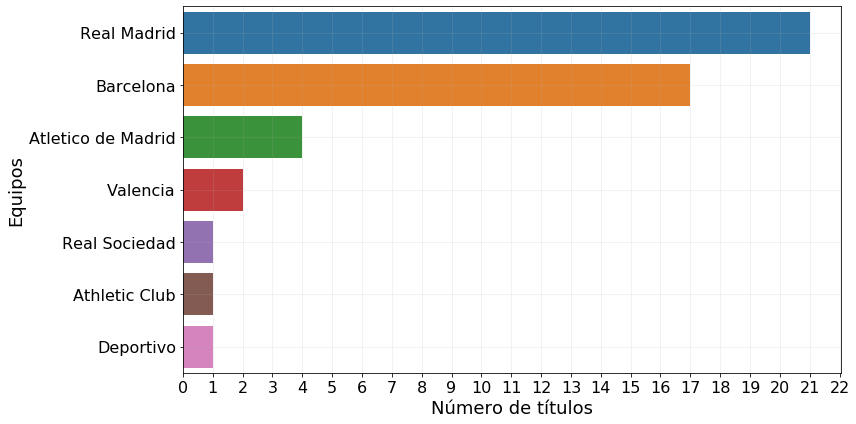

In [17]:
#Visualización gráfica de barras, número de titulos vs equipos:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.barplot(x=numeroTitulos, y=equiposCampeones, ax=ax)
ax.set_ylabel('Equipos', fontsize=18) 
ax.set_xlabel('Número de títulos', fontsize=18) 
ax.xaxis.set_major_locator(MaxNLocator(nbins=25, integer=True)) 
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, alpha=0.2) 

fig.tight_layout() 

El análisis de los equipos que ya ganaron La Liga reveló que existe una gran disparidad en la liga, 
con el Real Madrid y el Barcelona ganando más del 80% de los títulos en el período.

8)Generación de dummies con variables categóricas: 

Convertimos en dummies las variables categóricas para próximos calculos que utilizaremos en la elaboración 
de un modelo predictivo.

In [26]:
dummies1 = pd.get_dummies(datos['season'])
dummies1.head(6)

,1970-71,1971-72,1972-73,1973-74,1974-75,1975-76,1976-77,1977-78,1978-79,1979-80,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
dummies2 = pd.get_dummies(datos['club'])
dummies2.head(6)

,AD Almeria,Alaves,Albacete,Almeria,Athletic Club,Atletico de Madrid,Barcelona,Betis,Burgos,CD Malaga,...,Recreativo de Huelva,Sabadell,Salamanca,Sevilla,Sporting de Gijon,Tenerife,Valencia,Valladolid,Villarreal,Xerez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


9)Modelo de predicción:

A continuación vamos a realizar un modelo predictivo que trate de explicar la puntuación de un equipo
en función de las demás variables.

In [28]:
datos2 = pd.concat([datos, dummies1, dummies2], axis=1)

In [29]:
datos2['home_win'] = datos2['home_win'].astype(int)
datos2['away_win'] = datos2['away_win'].astype(int)
datos2['home_loss'] = datos2['home_loss'].astype(int)
datos2['away_loss'] = datos2['away_loss'].astype(int)
datos2['matches_won'] = datos2['matches_won'].astype(int)
datos2['matches_lost'] = datos2['matches_lost'].astype(int)
datos2['matches_drawn'] = datos2['matches_drawn'].astype(int)
datos2['total_matches'] = datos2['total_matches'].astype(int)
datos2['points'] = datos2['points'].astype(int)
datos2['home_goals'] = datos2['home_goals'].astype(int)
datos2['away_goals'] = datos2['away_goals'].astype(int)
datos2['goals_scored'] = datos2['goals_scored'].astype(int)
datos2['goals_conceded'] = datos2['goals_conceded'].astype(int)
datos2['goal_difference'] = datos2['goal_difference'].astype(int)

In [30]:
endogena = ['points']
exogenas = ['home_win','away_win','home_loss','away_loss','matches_won','matches_lost','matches_drawn','total_matches',
                    'home_goals','away_goals','goals_scored','goals_conceded','goal_difference']       

In [31]:
X = datos2[exogenas].values
Y = datos2[endogena].values

Separamos los datos en training y test para realizar un modelo y poder probarlo después dividiendo los datos en el 70% para 
prueba y 30% para test.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(635, 13) (635, 1)
(273, 13) (273, 1)


Procedemos a hacer un análisis de regresión con el método Lasso.
Primero formulamos el modelo y después realizamos la regresión.

In [34]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

C:\Users\alvar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0005236443985904939

In [36]:
model_lasso = Lasso(alpha=lassocv.alpha_) 
model_lasso.fit(X_train, Y_train) 
pred_lasso = model_lasso.predict(X_test) 
print(np.sqrt(mean_squared_error(Y_test,pred_lasso))) 
error_lasso = np.sqrt(mean_squared_error(Y_test,pred_lasso))
print(r2_score(Y_test, pred_lasso)) 

0.0021107249676620347
0.9999999809559303


Tenemos un error muy bajo a la hora de determinar los puntos de un equipo en una temporda. Esto quiere decir que si un equipo 
obtiene una cierta cantidad de puntos será como consecuencia de obtener buenos resultados en sus partidos.

10)Conclusión

En función al análisis de datos correspondientes a la base de datos La Liga deducimos las siguientes conclusiones:

1)No siempre se han jugado el mismo numero de partidos ni ha existido el mismo número de equipos a lo largo de 
todas las temporadas.

2)Las variables orientadas a victorias(partidos ganados en casa y fuera) lógicamente presentan una correlación 
muy positiva con la variable numérica puntos("points") y las variables orientadas a derrotas presentan una 
correlacion negativa.

3)El Real Madrid y el Barcelona han sido campeones la mayoría de las temporadas.

4)La predicción del modelo corrobora que la variable "points" depende significatívamente de las demás variables.